In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv(r"C:\Users\bvars\Downloads\cubic_zirconia.csv",index_col=0)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
df.duplicated().sum()

34

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(26933, 10)

In [10]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


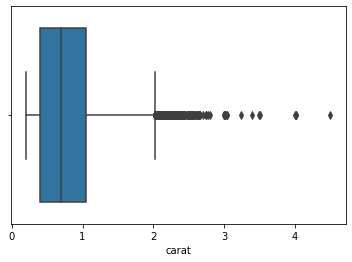

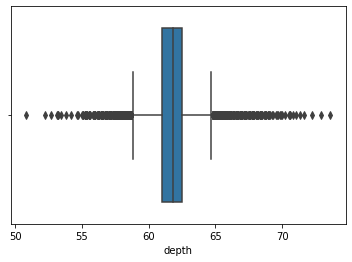

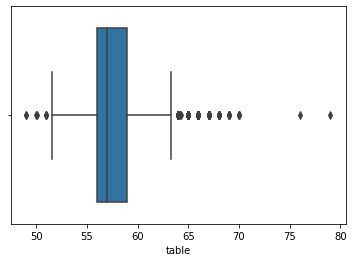

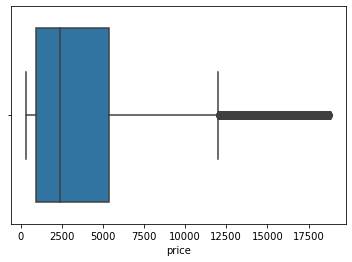

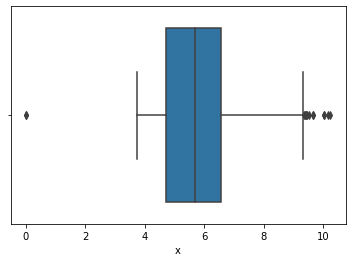

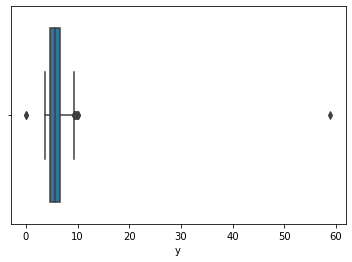

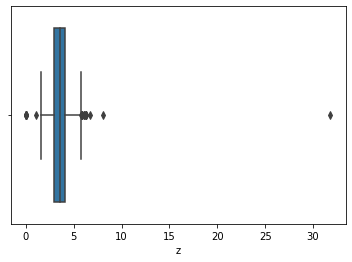

In [11]:
cols = ['carat' ,'depth', 'table',
       'price','x','y','z']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

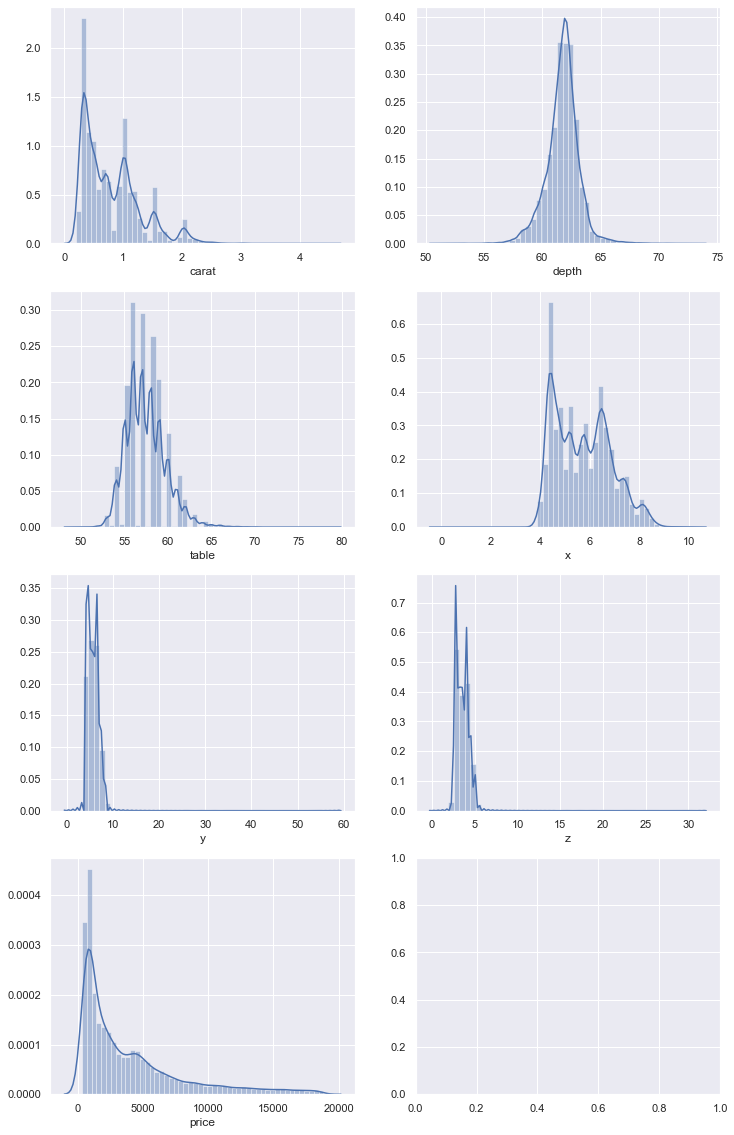

In [260]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
sns.distplot(df['carat'] , ax=axes[0][0])
sns.distplot(df['depth'] , ax=axes[0][1])
sns.distplot(df['table'] , ax=axes[1][0])
sns.distplot(df['x'] , ax=axes[1][1])
sns.distplot(df['y'] , ax=axes[2][0])
sns.distplot(df['z'] , ax=axes[2][1])
sns.distplot(df['price'] , ax=axes[3][0])

## Categorical value

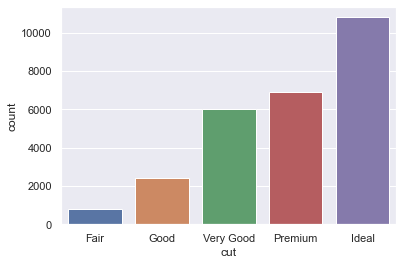

In [261]:
sns.countplot(df['cut'],order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

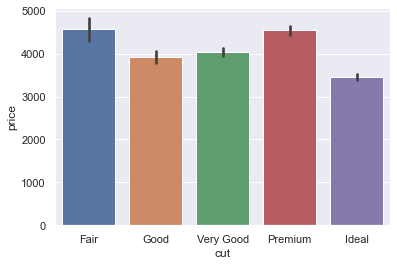

In [262]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

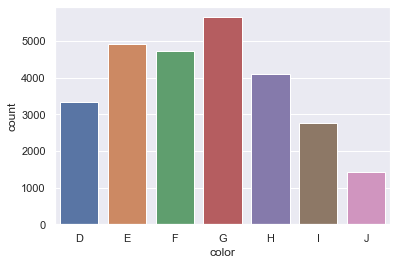

In [263]:
sns.countplot(df['color'] ,order = ['D', 'E', 'F', 'G','H', 'I', 'J'])

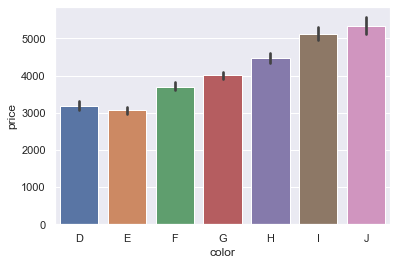

In [264]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )

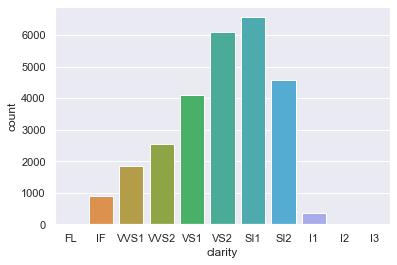

In [265]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

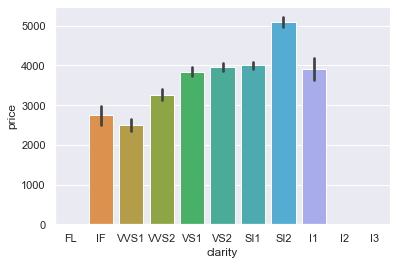

In [266]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

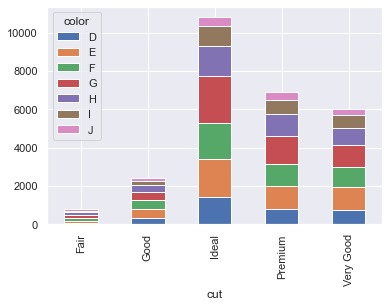

In [267]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

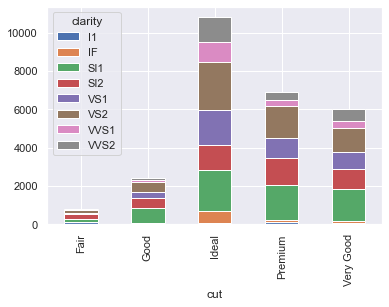

In [268]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

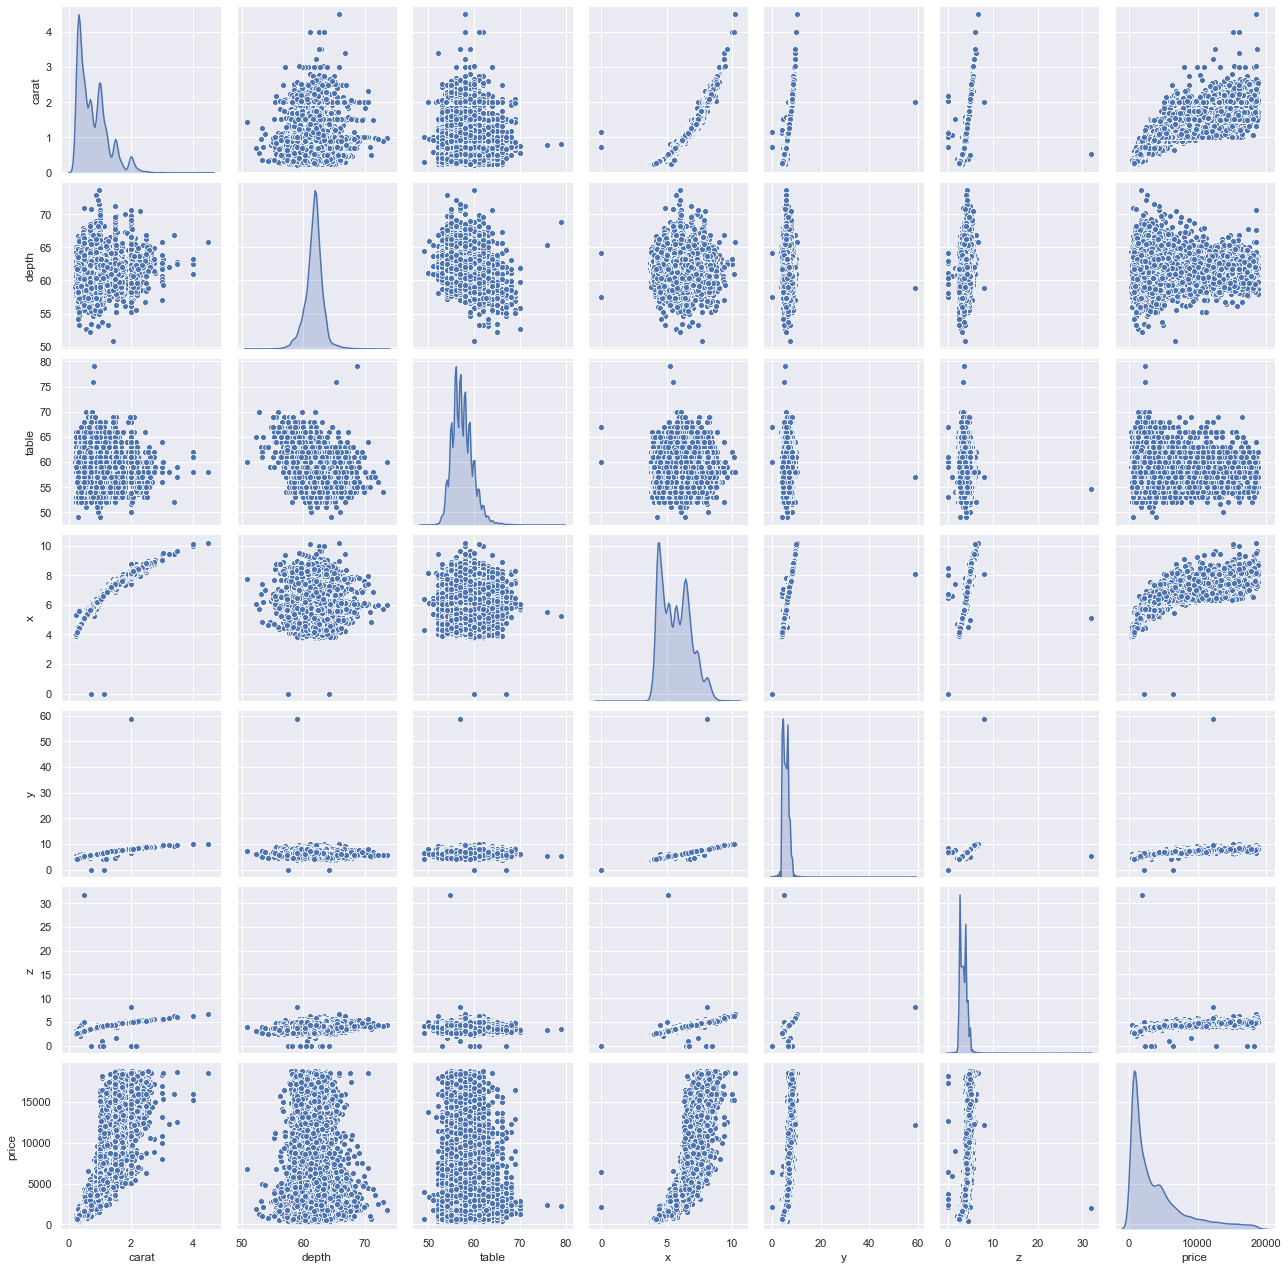

In [269]:
sns.pairplot(df,diag_kind='kde')

In [270]:
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


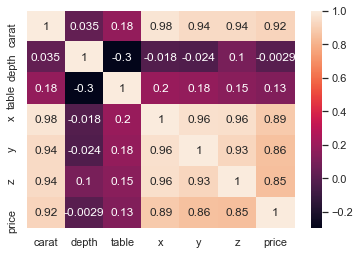

In [271]:
sns.heatmap(df.corr(),annot= True)

In [272]:
#imputing missing values
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.70
z           3.52
price    2375.00
dtype: float64

In [273]:
df=df.replace('',np.nan)

In [274]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [275]:
df.head(50)

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [276]:
df=df.fillna(df.median())

In [277]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [278]:
df=df.drop(['x','y','z'],axis=1)
#dropping x,y,z due to multicollinearity

### scaling data

In [279]:
#normalizong the values
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [280]:

sc = StandardScaler()

# get numeric data
num_d = df.select_dtypes(exclude=['object'])

# update the cols with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)


In [281]:
df.head()

,carat,cut,color,clarity,depth,table,price
1,-1.043547,Ideal,E,SI1,0.253470,0.243737,-0.854828
2,-0.980684,Premium,G,IF,-0.679199,0.243737,-0.734256
3,0.213713,Very Good,E,VVS2,0.325214,1.139749,0.584584
4,-0.792095,Ideal,F,VS1,-0.105249,-0.652274,-0.709892
5,-1.022593,Ideal,F,VVS1,-0.966174,0.691743,-0.785219


### Removing Outliers

In [282]:
#removing outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [283]:
#treating outliers
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

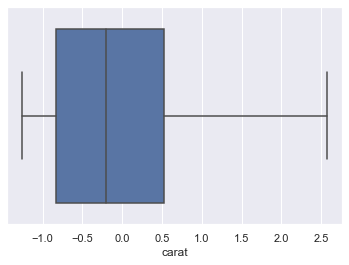

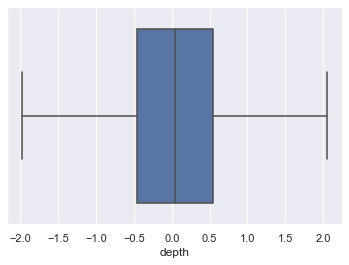

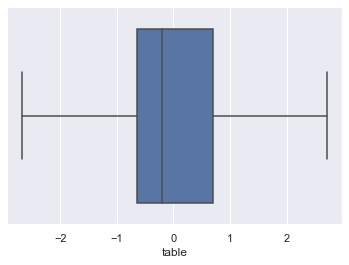

In [284]:
cols=['carat','depth','table']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### Encoding the data 

In [285]:
data= pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)

In [286]:
data.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.043547,0.253470,0.243737,-0.854828,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.980684,-0.679199,0.243737,-0.734256,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.213713,0.325214,1.139749,0.584584,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.792095,-0.105249,-0.652274,-0.709892,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,-1.022593,-0.966174,0.691743,-0.785219,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [287]:
x=data.drop('price',axis=1)


In [288]:
y=data[['price']]

In [289]:
x.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.043547,0.253470,0.243737,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.980684,-0.679199,0.243737,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0.213713,0.325214,1.139749,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.792095,-0.105249,-0.652274,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,-1.022593,-0.966174,0.691743,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [290]:
y.head()

,price
1,-0.854828
2,-0.734256
3,0.584584
4,-0.709892
5,-0.785219


In [291]:
x.isnull().sum()

carat            0
depth            0
table            0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

### splitting data into train and test data

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [294]:
#invoking the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [295]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 0.953858369389525
The coefficient for depth is -0.002769507343440731
The coefficient for table is -0.010522991938161022
The coefficient for cut_Good is 0.13565729215414193
The coefficient for cut_Ideal is 0.1915963000604459
The coefficient for cut_Premium is 0.17436365747035754
The coefficient for cut_Very Good is 0.17091227616427626
The coefficient for color_E is -0.045598158218227214
The coefficient for color_F is -0.06631437444466488
The coefficient for color_G is -0.10880732153330538
The coefficient for color_H is -0.21242360324095755
The coefficient for color_I is -0.3260689918111204
The coefficient for color_J is -0.47537578718097
The coefficient for clarity_IF is 1.0189991252177601
The coefficient for clarity_SI1 is 0.6333783272302662
The coefficient for clarity_SI2 is 0.4249097726248394
The coefficient for clarity_VS1 is 0.8423959432386026
The coefficient for clarity_VS2 is 0.766763183877408
The coefficient for clarity_VVS1 is 0.9599417211390577
The

In [296]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.79446018568466


In [298]:
regression_model.score(X_train, y_train)# R square on training data

0.9393229008343841

In [299]:
regression_model.score(X_test,y_test)#R square on testing data

0.9409610887221301

In [302]:
#root mean square error
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.21222745850147806

In [304]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.20984758535152348

### Using Stats model

In [305]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [306]:
vif=[variance_inflation_factor(x.values,ix) for ix in range(x.shape[1])]

In [307]:
i=0
for column in x.columns:
    if i < 11:
        print (column     ,"--->",  vif[i])
        i = i+1

carat ---> 1.3202101612442119
depth ---> 1.3078935845048758
table ---> 1.7629649109486525
cut_Good ---> 3.491182845811215
cut_Ideal ---> 14.127717022648358
cut_Premium ---> 8.579611464633043
cut_Very Good ---> 7.562134992343458
color_E ---> 2.3667168382175117
color_F ---> 2.321360188648329
color_G ---> 2.6590015472998307
color_H ---> 2.195621940303806


In [308]:
train_data=pd.concat([X_train,y_train],axis=1)
train_data.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
22115,-0.959730,0.468701,1.139749,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.845381
2276,-1.043547,-0.392224,-1.100279,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.769060
19184,-0.624461,0.540445,-0.204268,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-0.670613
5031,0.632799,1.114395,-0.652274,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.031690
25415,0.465165,-0.463968,2.035760,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0.029702


In [309]:
train_data.columns

Index(['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [310]:
train_data.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True)

In [311]:
train_data.columns

Index(['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very_Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

In [316]:
import statsmodels.formula.api as smf
formula= 'price ~ carat + depth + table + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'
lm1=smf.ols(formula,data = train_data).fit()
lm1.params

Intercept       -0.794460
carat            0.953858
depth           -0.002770
table           -0.010523
cut_Good         0.135657
cut_Ideal        0.191596
cut_Premium      0.174364
cut_Very_Good    0.170912
color_E         -0.045598
color_F         -0.066314
color_G         -0.108807
color_H         -0.212424
color_I         -0.326069
color_J         -0.475376
clarity_IF       1.018999
clarity_SI1      0.633378
clarity_SI2      0.424910
clarity_VS1      0.842396
clarity_VS2      0.766763
clarity_VVS1     0.959942
clarity_VVS2     0.951435
dtype: float64

In [317]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Sat, 11 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:51:10   Log-Likelihood:                 2472.7
No. Observations:               18853   AIC:                            -4903.
Df Residuals:                   18832   BIC:                            -4739.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7945      0.016    -48.629

In [318]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [319]:
import math
math.sqrt(mse)

0.20984758535152398

In [323]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.79) * Intercept + (0.95) * carat + (-0.0) * depth + (-0.01) * table + (0.14) * cut_Good + (0.19) * cut_Ideal + (0.17) * cut_Premium + (0.17) * cut_Very_Good + (-0.05) * color_E + (-0.07) * color_F + (-0.11) * color_G + (-0.21) * color_H + (-0.33) * color_I + (-0.48) * color_J + (1.02) * clarity_IF + (0.63) * clarity_SI1 + (0.42) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.96) * clarity_VVS1 + (0.95) * clarity_VVS2 + 